# Business Problem

As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms Of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.


# Research Question

### 1. Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

In [ ]:
# Imporing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data Description

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data
covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines Of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:


*   **Date:** The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
*   **Ad Views:** The number of times the ad was viewed.
*   **Ad Clicks:** The number of clicks received on the ad.
*   **Ad Conversions:** The number of conversions resulting from the ad.
*   **Cost per Ad:** The cost associated with running the Facebook ad campaign.
*   **Click-Through Rate (CTR):** The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
*   **Conversion Rate:** The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
*   **Cost per Click (CPC):** The average cost incurred per click on the ad.




In [ ]:
df = pd.read_csv('Capstone Dataset.csv')

print("Shape of the dataset:", df.shape)
print("\nDescriptive statistics:\n", df.describe())
print("\nInformation about the dataset:\n", df.info())
# print("\nFirst few rows of the dataset:\n", df.head())


Shape of the dataset: (365, 17)

Descriptive statistics:
        Facebook Ad Views  Facebook Ad Clicks  Facebook Ad Conversions  \
count         365.000000          365.000000               365.000000   
mean         2179.687671           44.049315                11.742466   
std           618.074639           12.140559                 2.924786   
min          1050.000000           15.000000                 5.000000   
25%          1656.000000           35.000000                10.000000   
50%          2202.000000           43.000000                12.000000   
75%          2717.000000           54.000000                13.000000   
max          3320.000000           73.000000                19.000000   

       AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  
count         365.00000         365.000000              365.000000  
mean         4717.19726          60.383562                5.980822  
std           561.11406          14.368225                1.628106  
min     

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

print("Categorical columns:", categorical_cols)

print('---------------')
print("Numerical columns:", numerical_cols)

Categorical columns: Index(['Facebook Ad Campaign', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Campaign',
       'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)',
       'AdWords Conversion Rate (Conversions / Click)',
       'AdWords Cost per Click (Ad Cost / Clicks)'],
      dtype='object')
---------------
Numerical columns: Index(['Facebook Ad Views', 'Facebook Ad Clicks', 'Facebook Ad Conversions',
       'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions'],
      dtype='object')


In [ ]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2023-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2023-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2023-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2023-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2023-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2023-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


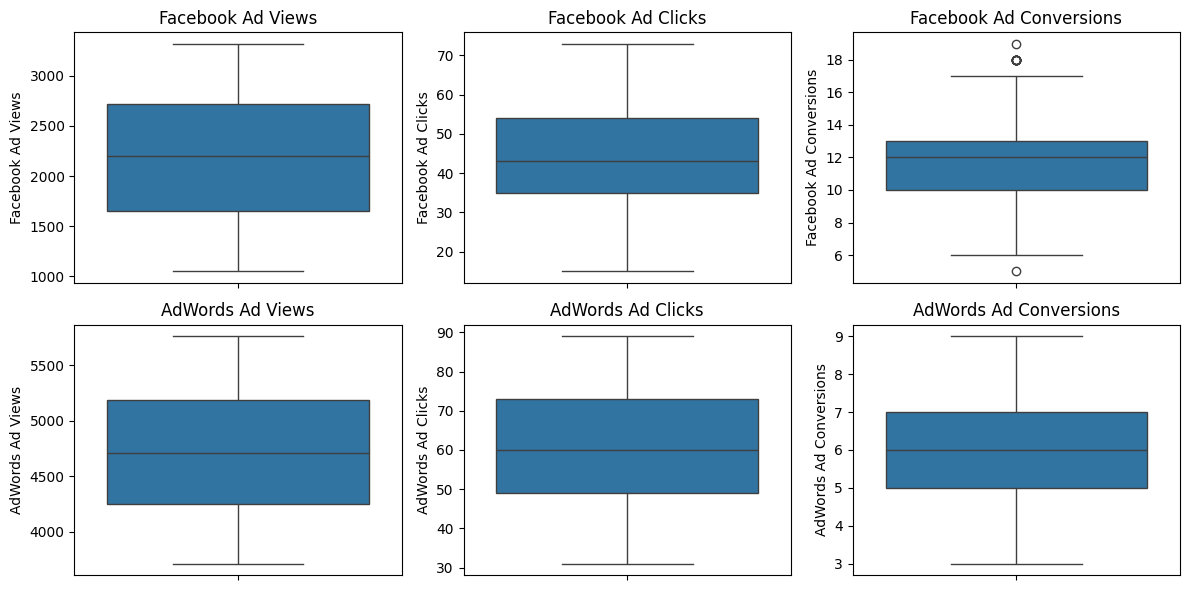

In [ ]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_cols):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(y=df[col])
  plt.title(col)
  plt.tight_layout()

plt.show()


# Comparing Campaigns performance

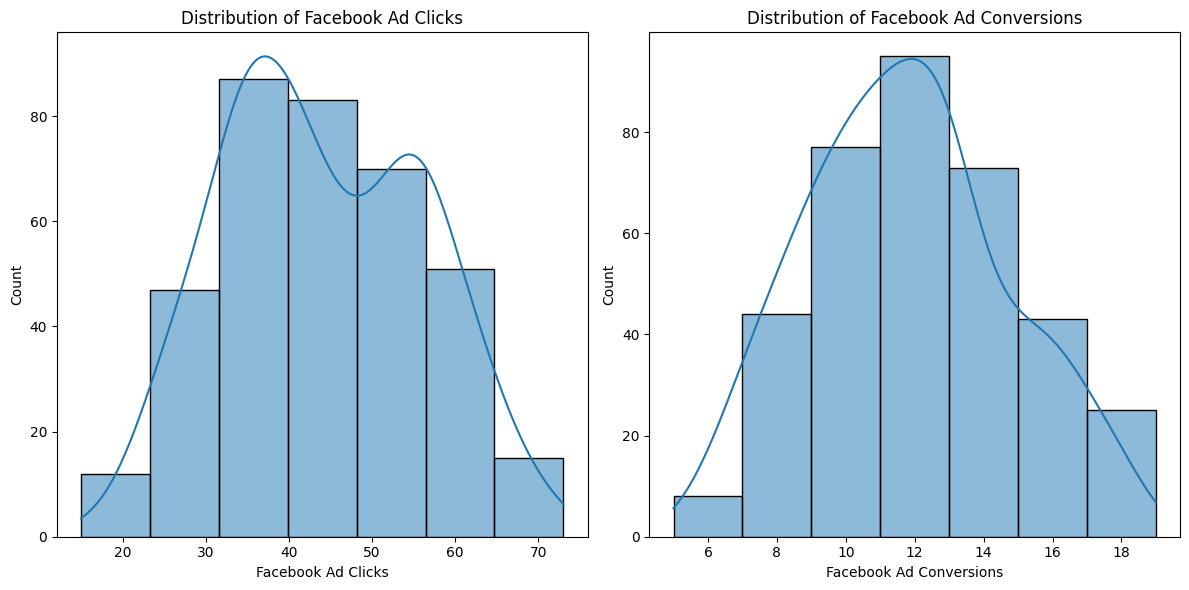

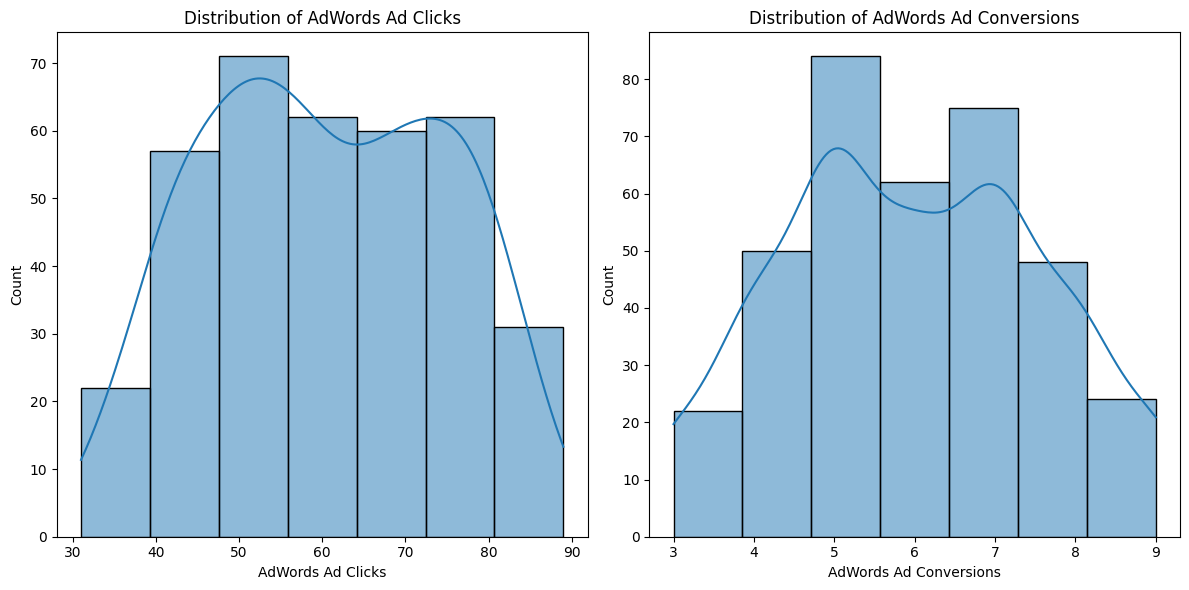

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Facebook Ad Clicks'], bins=7, kde=True)
plt.title('Distribution of Facebook Ad Clicks')

plt.subplot(1, 2, 2)
sns.histplot(df['Facebook Ad Conversions'], bins=7, kde=True)
plt.title('Distribution of Facebook Ad Conversions')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['AdWords Ad Clicks'], bins=7, kde=True)
plt.title('Distribution of AdWords Ad Clicks')

plt.subplot(1, 2, 2)
sns.histplot(df['AdWords Ad Conversions'], bins=7, kde=True)
plt.title('Distribution of AdWords Ad Conversions')

plt.tight_layout()
plt.show()


All the histogram are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.

### 2. How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [ ]:
def categorize_conversions(conversions_col):

  category = []
  for conversions in df[conversions_col]:
      if conversions < 6:
        category.append('Less than 6')

      elif 6 <= conversions < 11:
        category.append('6 - 10')

      elif 11 <= conversions < 16:
        category.append('11 - 15')

      else:
        category.append('More than 15')


  return category

In [ ]:
df['Facebook Conversion Category'] = categorize_conversions("Facebook Ad Conversions")
df['AdWords Conversion Category'] = categorize_conversions("AdWords Ad Conversions")

In [ ]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions', 'AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,Less than 6
1,12,11 - 15,6,6 - 10
2,8,6 - 10,4,Less than 6
3,9,6 - 10,5,Less than 6
4,7,6 - 10,7,6 - 10


In [ ]:
df['Facebook Conversion Category'].value_counts()

,count
Facebook Conversion Category,
11 - 15,189
6 - 10,128
More than 15,47
Less than 6,1


In [ ]:
FCC = df['Facebook Conversion Category'].value_counts().reset_index()
FCC = FCC.rename(columns={'Facebook Conversion Category':'Category'})
FCC


,Category,count
0,11 - 15,189
1,6 - 10,128
2,More than 15,47
3,Less than 6,1


In [ ]:
df['AdWords Conversion Category'].value_counts()

,count
AdWords Conversion Category,
6 - 10,209
Less than 6,156


In [ ]:
ACC = df['AdWords Conversion Category'].value_counts().reset_index()
ACC = ACC.rename(columns={'AdWords Conversion Category':'Category'})
ACC

,Category,count
0,6 - 10,209
1,Less than 6,156


In [ ]:
category_df = pd.merge(FCC, ACC, on='Category', how = 'outer').fillna(0)
category_df


,Category,count_x,count_y
0,11 - 15,189,0.0
1,6 - 10,128,209.0
2,More than 15,47,0.0
3,Less than 6,1,156.0


In [ ]:
category_df = category_df.iloc[[3, 1, 0, 2]]
category_df

,Category,count_x,count_y
3,Less than 6,1,156.0
1,6 - 10,128,209.0
0,11 - 15,189,0.0
2,More than 15,47,0.0


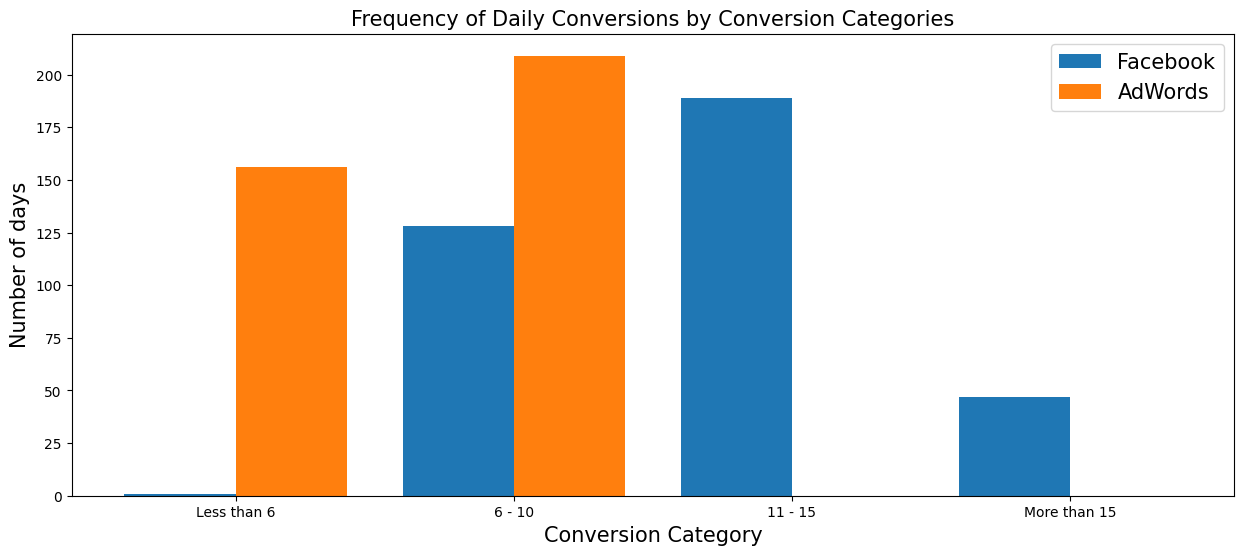

In [ ]:
X_axis = np.arange(len(category_df))
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook')
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'AdWords')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category", fontsize = 15)
plt.ylabel("Number of days", fontsize = 15)
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


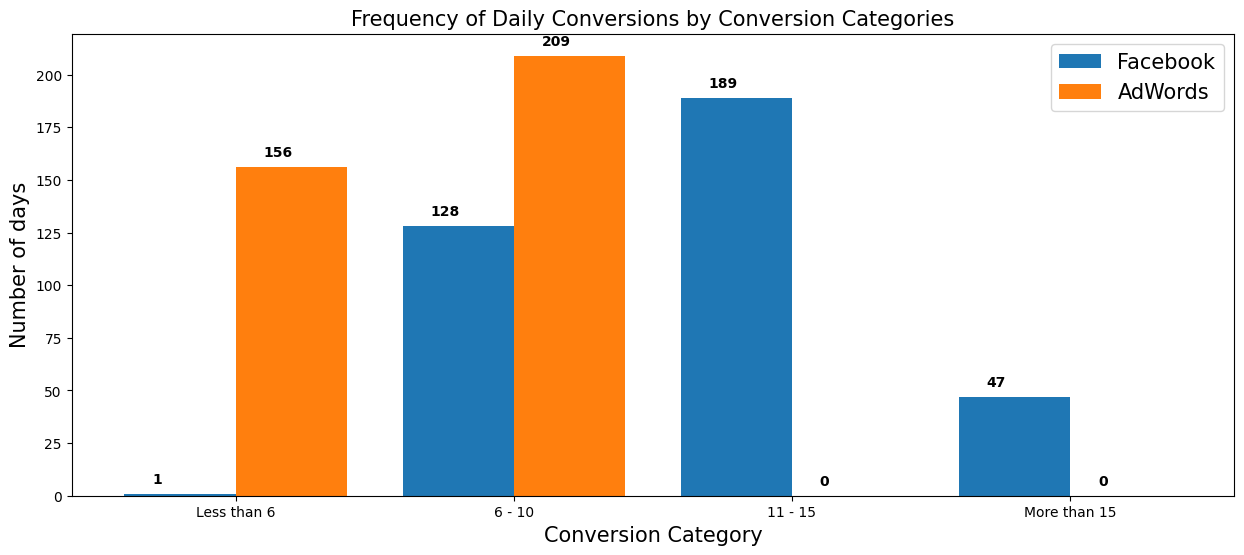

In [ ]:
X_axis = np.arange(len(category_df))
plt.figure(figsize = (15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook')
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'AdWords')

# Add values on top of bars
for i, v in enumerate(category_df['count_x']):
    plt.text(i - 0.3, v + 5, str(int(v)), color='black', fontweight='bold')

for i, v in enumerate(category_df['count_y']):
    plt.text(i + 0.1, v + 5, str(int(v)), color='black', fontweight='bold')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category", fontsize = 15)
plt.ylabel("Number of days", fontsize = 15)
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


* The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).
* There is a significant variance in the number of high-conversion days between two different campaigns.
* The absence of any days Yith conversions between IO - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

## Do more clicks on the ad really lead to more sales?

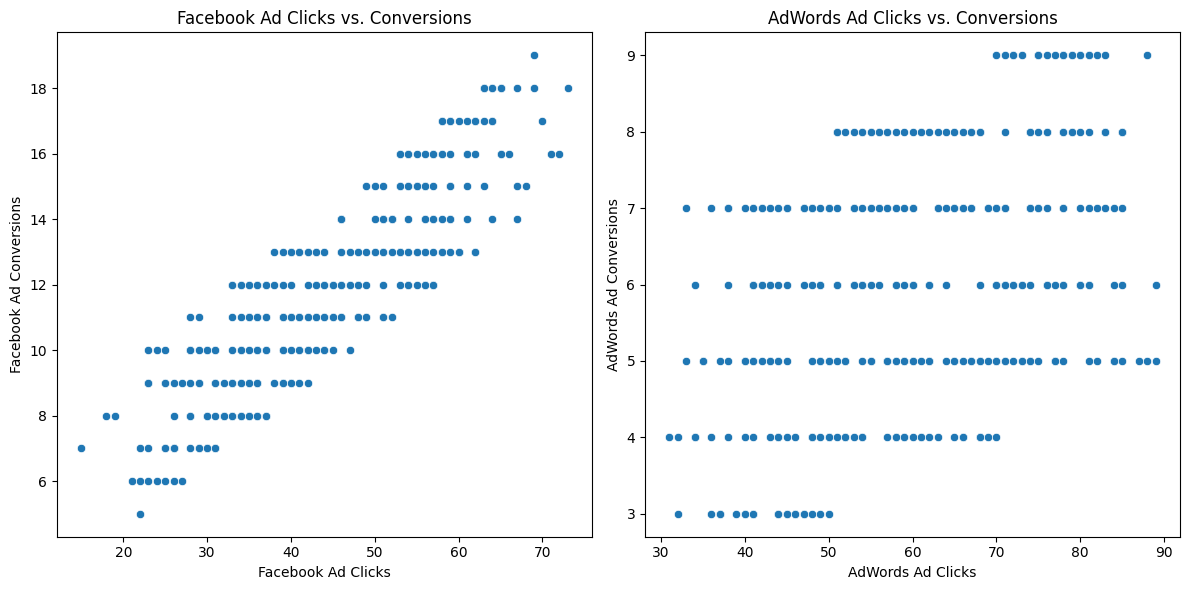

In [ ]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Facebook Ad Clicks vs. Facebook Ad Conversions
sns.scatterplot(x='Facebook Ad Clicks', y='Facebook Ad Conversions', data=df, ax=axes[0])
axes[0].set_title('Facebook Ad Clicks vs. Conversions')

# Plot 2: AdWords Ad Clicks vs. AdWords Ad Conversions
sns.scatterplot(x='AdWords Ad Clicks', y='AdWords Ad Conversions', data=df, ax=axes[1])
axes[1].set_title('AdWords Ad Clicks vs. Conversions')

plt.tight_layout()
plt.show()


In [ ]:
fb_corr = df['Facebook Ad Clicks'].corr(df['Facebook Ad Conversions'])

print("Correlation between Facebook Ad Clicks and Facebook Ad Conversions:", fb_corr)


Correlation between Facebook Ad Clicks and Facebook Ad Conversions: 0.8737750148613909


In [ ]:
# adw_corr = df[['AdWords Ad Clicks', 'AdWords Ad Conversions']].corr()

adw_corr = df['AdWords Ad Clicks'].corr(df['AdWords Ad Conversions'])

adw_corr

0.44799320094697687

In [ ]:
print('Correlation Coeff : \n')

print('Facebook :', fb_corr)
print('AdWords :', adw_corr)

Correlation Coeff : 

Facebook : 0.8737750148613909
AdWords : 0.44799320094697687


• A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.

• This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.

• The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.

• A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.

• The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be
influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

# Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0 : FB <= AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1 : FB > AdWords


In [ ]:
print('Mean Conversion :')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(), 2))
print('AdWords :', round(df['AdWords Ad Conversions'].mean(), 2))

Mean Conversion :
Facebook : 11.74
AdWords : 5.98


In [ ]:
# Perform independent two-sample t-test
a = df['Facebook Ad Conversions']
b = df['AdWords Ad Conversions']
t_stats, p_value = stats.ttest_ind(a, b, equal_var=False)

print("T-statistic:", t_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the number of conversions between Facebook and AdWords.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of conversions between Facebook and AdWords.")

T-statistic: 32.88402060758184
P-value: 9.348918164530465e-134
Reject the null hypothesis. There is a significant difference in the number of conversions between Facebook and AdWords.


• The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on avelage, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

• The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means Of the two groups.

• The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

• The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.

• Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.

• Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving
conversions.

# Regression Analysis

What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook
ad clicks?

In [ ]:
# Reshape the data
X = df['Facebook Ad Clicks'].values.reshape(-1, 1)
y = df['Facebook Ad Conversions'].values.reshape(-1, 1)

# X = df[['Facebook Ad Clicks']]
# y = df[['Facebook Ad Conversions']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model1
model1 = LinearRegression()

# Fit the model1 to the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model1.predict(X_test)

# Evaluate the model1
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 3))
print("R-squared:", round(r2 * 100, 2), '%')


Mean Squared Error: 2.186
R-squared: 77.52 %


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
model2 = DecisionTreeRegressor(random_state=42)

# Fit the model2 to the training data
model2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred2 = model2.predict(X_test)

# Evaluate the model2
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Decision Tree - Mean Squared Error:", round(mse2, 3))
print("Decision Tree - R-squared:", round(r2_2 * 100, 2), '%')


Decision Tree - Mean Squared Error: 2.741
Decision Tree - R-squared: 71.82 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest regression model
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model3 to the training data
model3.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred3 = model3.predict(X_test)

# Evaluate the model3
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Random Forest - Mean Squared Error:", round(mse3, 3))
print("Random Forest - R-squared:", round(r2_3 * 100, 2), '%')


Random Forest - Mean Squared Error: 2.589
Random Forest - R-squared: 73.38 %


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting regression model
model4 = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model4 to the training data
model4.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred4 = model4.predict(X_test)

# Evaluate the model4
mse4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)

print("Gradient Boosting - Mean Squared Error:", round(mse4, 3))
print("Gradient Boosting - R-squared:", round(r2_4 * 100, 2), '%')


Gradient Boosting - Mean Squared Error: 2.589
Gradient Boosting - R-squared: 73.39 %


In [ ]:
from sklearn.svm import SVR
# Create a SVM regression model
model5 = SVR(kernel='linear')

# Fit the model5 to the training data
model5.fit(X_train, y_train.ravel())

# Make predictions on the testing data
y_pred5 = model5.predict(X_test)

# Evaluate the model5
mse5 = mean_squared_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)

print("SVM - Mean Squared Error:", round(mse5, 3))
print("SVM - R-squared:", round(r2_5 * 100, 2), '%')


SVM - Mean Squared Error: 2.217
SVM - R-squared: 77.2 %


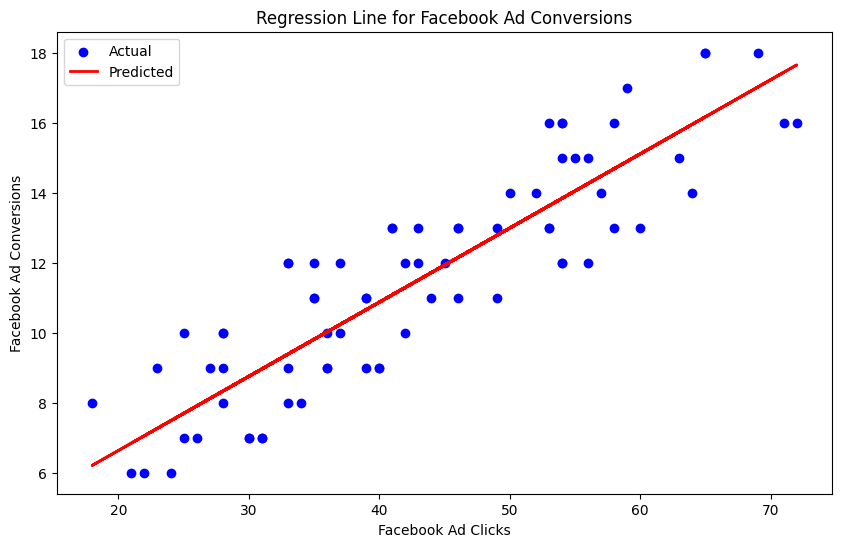

In [ ]:
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.title('Regression Line for Facebook Ad Conversions')
plt.legend()
plt.show()


In [ ]:
# Predict conversions for 50 clicks

new_clicks = np.array([[50]])
predicted_conversions = model1.predict(new_clicks)

print("Predicted conversions for 50 clicks:", round(predicted_conversions[0][0]))


Predicted conversions for 50 clicks: 13


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create an input box for number of clicks
clicks_input = widgets.IntText(
    value=0,
    description='Clicks:',
    disabled=False
)

# Create a button to trigger prediction
predict_button = widgets.Button(
    description='Predict Conversions',
    disabled=False,
    button_style='success',
    tooltip='Click to predict conversions',
    icon='check'
)

# Display the input box and button
display(clicks_input, predict_button)

# Define a function to handle prediction
def predict_conversions(sender):
    clicks = clicks_input.value
    prediction = model1.predict([[clicks]])
    print("Predicted Conversions:", round(prediction[0][0]))

# Attach the prediction function to the button's on_click event
predict_button.on_click(predict_conversions)


IntText(value=0, description='Clicks:')

Button(button_style='success', description='Predict Conversions', icon='check', style=ButtonStyle(), tooltip='…

Predicted Conversions: 24


• The model has a reasonably good predictive power, with an R2 score of 77.52%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

• With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.

• For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

# Analyzing Facebook compaign metrics over time

In [ ]:
# cleaning data ( removing unwanted symbols from the columns and converting them to numerical columns)


df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].str.replace('%', '')
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].str.replace('%', '')
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].str.replace('$', '')
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].str.replace('$', '')


In [ ]:
df[['Facebook Click-Through Rate (Clicks / View)', 'Facebook Conversion Rate (Conversions / Clicks)'
,'Facebook Cost per Click (Ad Cost / Clicks)', 'Cost per Facebook Ad']]


In [ ]:
df.columns

Index(['Date', 'Facebook Ad Campaign', 'Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Campaign',
       'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions',
       'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)',
       'AdWords Conversion Rate (Conversions / Click)',
       'AdWords Cost per Click (Ad Cost / Clicks)'],
      dtype='object')

In [ ]:
new_df = df[['Date','Facebook Ad Views', 'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)',]]


In [ ]:
new_df

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,1/1/2023,2116,18,8,126,0.83,42.73,7.14
1,1/2/2023,3106,36,12,104,1.15,34.04,2.91
2,1/3/2023,3105,26,8,102,0.84,31.45,3.89
3,1/4/2023,1107,27,9,71,2.45,34.76,2.62
4,1/5/2023,1317,15,7,78,1.10,47.59,5.38
...,...,...,...,...,...,...,...,...
360,12/27/2023,3240,51,13,63,1.57,25.89,1.24
361,12/28/2023,1510,69,18,97,4.55,25.82,1.42
362,12/29/2023,2918,44,13,49,1.50,29.11,1.11
363,12/30/2023,2212,37,8,102,1.68,22.70,2.75


# At what times of the month or days of the week do we observe the conversions?

In [ ]:

new_df['Date'] = pd.to_datetime(new_df['Date'])


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Views                                365 non-null    int64         
 2   Facebook Ad Clicks                               365 non-null    int64         
 3   Facebook Ad Conversions                          365 non-null    int64         
 4   Cost per Facebook Ad                             365 non-null    object        
 5   Facebook Click-Through Rate (Clicks / View)      365 non-null    object        
 6   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object        
 7   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)

In [ ]:
new_df['Month'] = new_df['Date'].dt.month
new_df['Day of Week'] = new_df['Date'].dt.dayofweek


In [ ]:
new_df[['Date', 'Month', 'Day of Week']]

,Date,Month,Day of Week
0,2023-01-01,1,6
1,2023-01-02,1,0
2,2023-01-03,1,1
3,2023-01-04,1,2
4,2023-01-05,1,3
...,...,...,...
360,2023-12-27,12,2
361,2023-12-28,12,3
362,2023-12-29,12,4
363,2023-12-30,12,5


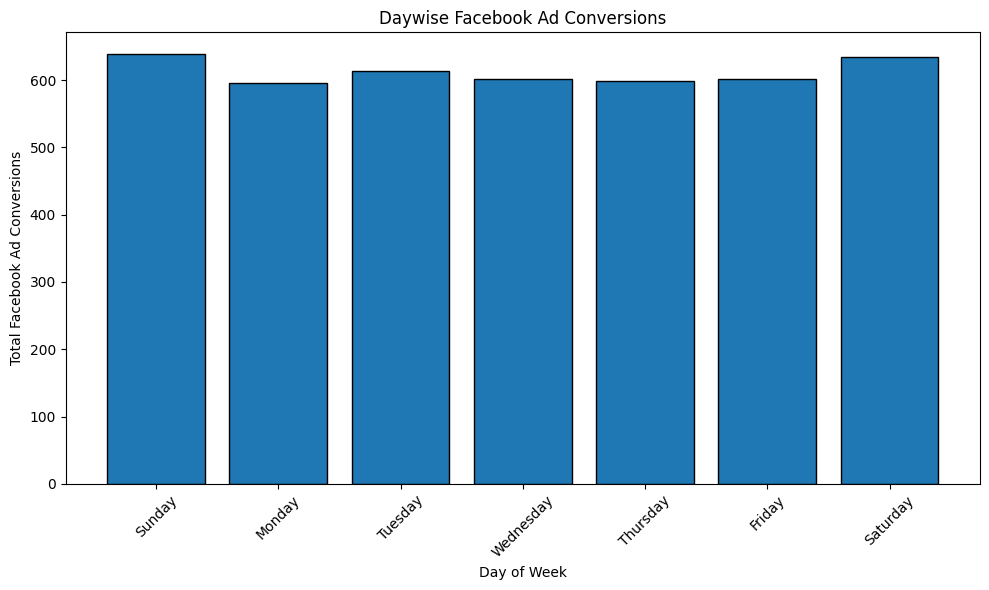

In [ ]:
# Calculate daily conversions
daily_conversions = new_df.groupby('Day of Week')['Facebook Ad Conversions'].sum().reset_index()

# Map day of week to day names
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_conversions['Day of Week'] = daily_conversions['Day of Week'].map(lambda x: day_names[x])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(daily_conversions['Day of Week'], daily_conversions['Facebook Ad Conversions'], edgecolor = 'k')
plt.xlabel('Day of Week')
plt.ylabel('Total Facebook Ad Conversions')
plt.title('Daywise Facebook Ad Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
daily_conversions

,Day of Week,Facebook Ad Conversions
0,Sunday,639
1,Monday,596
2,Tuesday,614
3,Wednesday,602
4,Thursday,599
5,Friday,601
6,Saturday,635


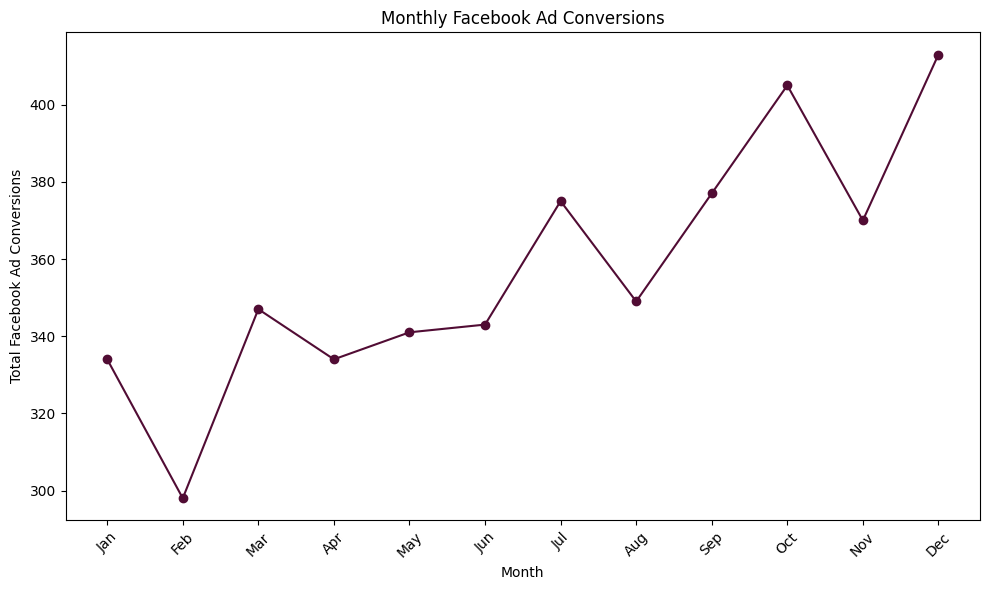

In [ ]:
# Calculate monthly conversions
monthly_conversions = new_df.groupby('Month')['Facebook Ad Conversions'].sum().reset_index()

# Map month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_conversions['Month'] = monthly_conversions['Month'].map(lambda x: month_names[x-1])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_conversions['Month'], monthly_conversions['Facebook Ad Conversions'], '-o', color = '#510c34')
plt.xlabel('Month')
plt.ylabel('Total Facebook Ad Conversions')
plt.title('Monthly Facebook Ad Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week.However, Mondays and Tuesdays
consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees
heightened user engagement or responsiveness to marketing efforts.

* Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.

# How does the Cost Per Conversion (CPC) trend over time?

**Cost Per Conversion (CPC):** This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

In [ ]:
new_df['Cost per Facebook Ad'] = new_df['Cost per Facebook Ad'].astype(float)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Views                                365 non-null    int64         
 2   Facebook Ad Clicks                               365 non-null    int64         
 3   Facebook Ad Conversions                          365 non-null    int64         
 4   Cost per Facebook Ad                             365 non-null    float64       
 5   Facebook Click-Through Rate (Clicks / View)      365 non-null    object        
 6   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object        
 7   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object        
 8   Month                                   

In [ ]:
# # Calculate monthly cost per conversion
# monthly_cost_per_conversion = new_df.groupby('Month').apply(lambda x: x['Cost per Facebook Ad'].sum() / x['Facebook Ad Conversions'].sum()).reset_index(name='Cost per Conversion')

# # Map month numbers to month names
# month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# monthly_cost_per_conversion['Month'] = monthly_cost_per_conversion['Month'].map(lambda x: month_names[x-1])

# # Plot the line chart
# plt.figure(figsize=(10, 6))
# plt.plot(monthly_cost_per_conversion['Month'], monthly_cost_per_conversion['Cost per Conversion'], '-o', color='#510c34')
# plt.xlabel('Month')
# plt.ylabel('Cost per Conversion')
# plt.title('Monthly Cost per Conversion Trend')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


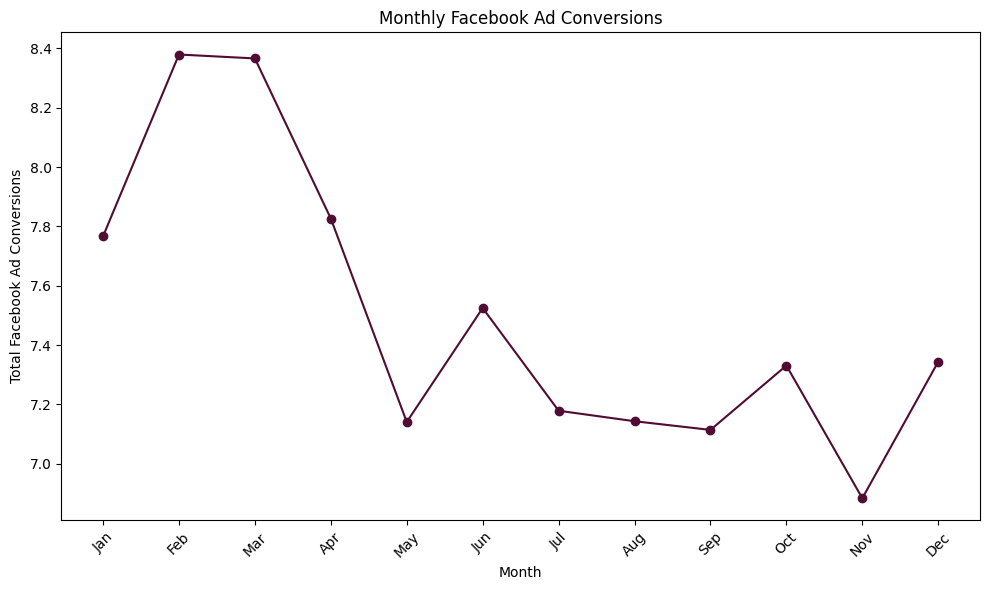

In [ ]:
# Calculate monthly conversions
monthly_conversions = new_df.groupby('Month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum().reset_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_conversions['Month'] = monthly_conversions['Month'].map(lambda x: month_names[x-1])

monthly_conversions['Cost per Conversion'] = monthly_conversions['Cost per Facebook Ad'] / monthly_conversions['Facebook Ad Conversions']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.title('Monthly Cost Per Cobnversion')

plt.plot(monthly_conversions['Month'], monthly_conversions['Cost per Conversion'], '-o', color = '#510c34')
plt.xlabel('Month')
plt.ylabel('Total Facebook Ad Conversions')
plt.title('Monthly Facebook Ad Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
monthly_conversions = new_df.groupby('Month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum().reset_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_conversions['Month'] = monthly_conversions['Month'].map(lambda x: month_names[x-1])


monthly_conversions['Cost per Conversion'] = monthly_conversions['Cost per Facebook Ad'] / monthly_conversions['Facebook Ad Conversions']

monthly_conversions

,Month,Facebook Ad Conversions,Cost per Facebook Ad,Cost per Conversion
0,Jan,334,2594.0,7.766467
1,Feb,298,2497.0,8.379195
2,Mar,347,2903.0,8.365994
3,Apr,334,2614.0,7.826347
4,May,341,2435.0,7.140762
5,Jun,343,2581.0,7.524781
6,Jul,375,2692.0,7.178667
7,Aug,349,2493.0,7.143266
8,Sep,377,2682.0,7.114058
9,Oct,405,2969.0,7.330864


* The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.

* May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.

* February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.

* Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.

* Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.

# Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [ ]:
# Calculate the score and p-value using coint
score, pval, _ = coint(new_df['Cost per Facebook Ad'], new_df['Facebook Ad Conversions'])

print("Cointegration Score:", score)
print("P-value:", pval)

print('\n')

if pval < 0.05:
    print("There is a statistically significant relationship between advertising spend and conversion rates.")
else:
    print("There is no statistically significant relationship between advertising spend and conversion rates.")


Cointegration Score: -14.755428385103219
P-value: 2.1337375979061323e-26


There is a statistically significant relationship between advertising spend and conversion rates.


* Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.

* Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing
costs.